In [127]:
import pandas as pd
import numpy as np

df = pd.read_csv('구내식당_data/train.csv', encoding='utf-8')
test_df = pd.read_csv('구내식당_data/test.csv', encoding='utf-8')
df.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [3]:
df.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [4]:
def get_food(row):
    row = row.split(' ')
    x = []
    for i in row:
        if '/' in i:
            a = i.split('/')
            for b in a:
                x.append(b)
        else:
            if '(' in i and ')' in i:
                continue
            if i=='\n':
                continue
            x.append(i)
    x = list(set(x))
    x.remove('')
    return x

In [5]:
df['조식메뉴'] = df['조식메뉴'].apply(lambda x : get_food(x))
df['중식메뉴'] = df['중식메뉴'].apply(lambda x : get_food(x))
df['석식메뉴'] = df['석식메뉴'].apply(lambda x : get_food(x))

In [7]:
df.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,"[모닝롤, 포기김치, 호두죽, 된장찌개, 계란후라이, 쌀밥, 주스, 두유, 찐빵, ...","[포기김치, 오징어찌개, 계란찜, 쌀밥, 쇠불고기, 요구르트, 청포묵무침, 잡곡밥]","[두부조림, 포기김치, 자반고등어구이, 육개장, 쌀밥, 건파래무침, 잡곡밥]",1039.0,331.0


In [128]:
df = df.drop(['일자','조식메뉴','중식메뉴','석식메뉴'], axis=1)
test_df = test_df.drop(['일자','조식메뉴','중식메뉴','석식메뉴'], axis=1)

In [129]:
day = {
    '월': 1,
    '화': 2,
    '수': 3,
    '목': 4,
    '금': 5
}

df['요일'] = df['요일'].map(day)
test_df['요일'] = test_df['요일'].map(day)

In [130]:
df.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,1,2601,50,150,238,0.0,1039.0,331.0
1,2,2601,50,173,319,0.0,867.0,560.0


In [131]:
df['식사가능 인원수'] = df['본사정원수'] - df['본사휴가자수'] - df['현본사소속재택근무자수']
test_df['식사가능 인원수'] = test_df['본사정원수'] - test_df['본사휴가자수'] - test_df['현본사소속재택근무자수']

In [132]:
df['중식참여율'] = df['중식계'] / df['식사가능 인원수']
df['석식참여율'] = df['석식계'] / df['식사가능 인원수']

In [133]:
df.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능 인원수,중식참여율,석식참여율
0,1,2601,50,150,238,0.0,1039.0,331.0,2551.0,0.407291,0.129753
1,2,2601,50,173,319,0.0,867.0,560.0,2551.0,0.339867,0.219522


<AxesSubplot:>

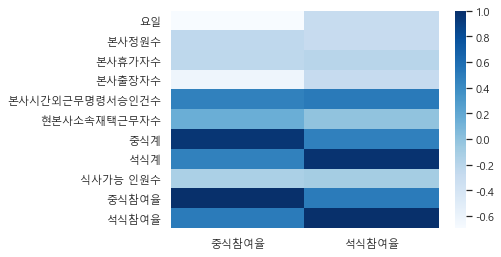

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

sns.heatmap(df.corr()[['중식참여율','석식참여율']], cmap='Blues')

In [135]:
target = df[['중식계','석식계']]
X_data = df.drop(['중식계','석식계','중식참여율','석식참여율'], axis=1)

In [136]:
target.shape, X_data.shape

((1205, 2), (1205, 7))

In [137]:
X_data.head(1)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,식사가능 인원수
0,1,2601,50,150,238,0.0,2551.0


In [97]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

params = {
    'max_depth' : [3, 5, 7, 10],
    'num_leaves' : [15, 31,63],
    'n_estimators' : [100, 300],
    'min_child_samples' : [20, 40],
    'learning_rate' : [0.1, 0.08, 0.09]
}

lgbm_lunch_reg = LGBMRegressor()

lunch_reg = GridSearchCV(lgbm_lunch_reg, params, scoring='neg_mean_absolute_error')

In [96]:
x = X_data[['요일', '식사가능 인원수', '본사출장자수', '본사시간외근무명령서승인건수']]
test = test_df[['요일', '식사가능 인원수', '본사출장자수', '본사시간외근무명령서승인건수']]

In [117]:
X_data.head(1)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,식사가능 인원수,중식참여율,석식참여율
0,1,2601,50,150,238,0.0,2551.0,0.407291,0.129753


In [98]:
lunch_reg.fit(x, target['중식계'])
print(lunch_reg.best_score_, lunch_reg.best_params_)
lunch_reg = lunch_reg.best_estimator_

-88.21247880019999 {'learning_rate': 0.08, 'max_depth': 3, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 15}


In [99]:
lunch_pred = lunch_reg.predict(test)

In [100]:
submission = pd.read_csv('구내식당_data/submission.csv', encoding='utf-8')

In [121]:
submission['중식계'] = lunch_pred

In [110]:
lgbm_dinner_reg = LGBMRegressor()

dinner_reg = GridSearchCV(lgbm_dinner_reg, params, scoring='neg_mean_absolute_error')

In [111]:
dinner_reg.fit(x, target['석식계'])
print(dinner_reg.best_score_, dinner_reg.best_params_)
dinner_reg = dinner_reg.best_estimator_

-82.85642892690112 {'learning_rate': 0.08, 'max_depth': 3, 'min_child_samples': 40, 'n_estimators': 100, 'num_leaves': 15}


In [113]:
dinner_pred = dinner_reg.predict(test)

In [122]:
submission['석식계'] = dinner_pred

In [123]:
submission.head(10)

,일자,중식계,석식계
0,2021-01-27,1023.414737,388.444555
1,2021-01-28,966.833798,513.681344
2,2021-01-29,570.997130,274.163541
3,2021-02-01,1212.497272,532.421117
4,2021-02-02,1030.369336,546.734576
5,2021-02-03,1023.433793,389.210293
6,2021-02-04,979.063965,525.801540
7,2021-02-05,647.241246,337.551744
8,2021-02-08,1243.656608,618.899641
9,2021-02-09,1026.969286,540.651303


In [155]:
from sklearn.model_selection import train_test_split

a = LGBMRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, min_child_samples=20, num_leaves=15)
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=23)
a.fit(X_train, y_train['중식계'])
pred = a.predict(X_test)
print(mean_absolute_error(y_test['중식계'], pred))

89.06432140414891


In [156]:
from sklearn.ensemble import RandomForestRegressor

b = RandomForestRegressor(n_estimators=1000, criterion='mae')
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=23)
b.fit(X_train, y_train['중식계'])
pred = b.predict(X_test)
print(mean_absolute_error(y_test['중식계'], pred))

82.42981629834253


In [157]:
pred = b.predict(test)

In [158]:
submission['중식계'] = pred

In [161]:
c = RandomForestRegressor(n_estimators=1000, criterion='mae')
c.fit(x, target['석식계'])
pred = c.predict(test)

In [162]:
submission['석식계'] = pred

In [163]:
submission.head()

,일자,중식계,석식계
0,2021-01-27,1046.0765,364.9780
1,2021-01-28,967.2425,501.4490
2,2021-01-29,604.7455,244.9595
3,2021-02-01,1219.6895,459.8170
4,2021-02-02,1027.4985,535.7700


In [165]:
submission.to_csv('submission_rf.csv', index=False)

In [167]:
a = pd.read_csv('submission_rf.csv', encoding='utf-8')
a.head()

,일자,중식계,석식계
0,2021-01-27,1046.0765,364.9780
1,2021-01-28,967.2425,501.4490
2,2021-01-29,604.7455,244.9595
3,2021-02-01,1219.6895,459.8170
4,2021-02-02,1027.4985,535.7700
